In [3]:
!pip install pycountry

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pycountry

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("ds_salaries.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [5]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
# The salary information in this dataset was calculated on a monthly basis. This enables processing based on monthly salaries instead of annual salaries
df['salary_in_usd'] = (df['salary_in_usd'] / 12).round(2)
df['salary'] = (df['salary'] / 12).round(2) 

# The name of the 'remote_ratio' column was changed to 'work_style'. The names of the three feasible working models with values 0, 50, and 100 were replaced accordingly. This made the data more readable
df.rename(columns={"remote_ratio": "work_style"}, inplace=True)
df["work_style"].replace({0: "Office", 50: "Hybrid", 100: "Remote"}, inplace=True)

# The abbreviations FT, PT, CT, FL in the 'employment_type' column were removed for better readability
df["employment_type"].replace({"FT": "Full-Time", "PT": "Part-Time", "CT": "Contract", "FL": "Freelance"}, inplace=True)

# Rearranged the abbreviations S, M, L in the 'company_size' column with their full forms. This made the data more readable
df["company_size"].replace({"S": "Small", "M": "Medium", "L": "Large"}, inplace=True)

# By replacing the expressions SE, MI, EN, EX with more descriptive definitions in the 'experience_level' column, the data became more readable
df["experience_level"].replace({"SE": "Senior-level", "MI": "Mid-level", "EN": "Entry-level", "EX": "Executive-level"}, inplace=True)

# Converting given country codes to the full names of countries.
def country_code_to_name(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    except:
        return country_code
def country_code_to_name(code):
    try:
        country = pycountry.countries.get(alpha_2=code)
        return country.name
    except:
        return None

df['company_location'] = df['company_location'].apply(country_code_to_name)
df['employee_residence'] = df['employee_residence'].apply(country_code_to_name)



# Methods for visualization


def barhplot(index, values, x_label, title, cmap, figsize, use_salary_format:bool):

    color_map = plt.cm.get_cmap(cmap)
    
    plt.figure(figsize=figsize)
    bars = plt.barh(index, values, color=color_map(np.arange(len(values)) / len(values))) 

    plt.xlabel(x_label)
    plt.title(title)
    
    for bar in bars:
        width = bar.get_width()
        if use_salary_format:
            if width < 100:
                plt.text(width + 10, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center', fontsize=9)
            else:
                plt.text(width - 10, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='right', va='center', fontsize=9)
        else:
            if width < 100:
                plt.text(width + 10, bar.get_y() + bar.get_height() / 2, f'{int(width)}', ha='left', va='center', fontsize=9)
            else:
                plt.text(width - 10, bar.get_y() + bar.get_height() / 2, f'{int(width)}', ha='right', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()
    

def barplot(index, values1, values2, x_label, y_label, title, work_styles, use_salary_format:bool):
    plt.figure(figsize=(10, 6))
    bar_width = 0.35
    opacity = 0.5

    one = plt.bar(index, values1, bar_width, alpha=opacity, color="orange", label='2022')
    two = plt.bar(index + bar_width, values2, bar_width, alpha=opacity, color='blue', label='2023')

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    plt.xticks(index + bar_width/2, work_styles)
    plt.xticks(rotation=45)

    for bar in one:
        height = bar.get_height()
        if use_salary_format:
            plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=9)
        else:
            plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=9)

    for bar in two:
        height = bar.get_height()
        if use_salary_format:
            plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=9)
        else:
            plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=9)

    plt.legend()

    plt.tight_layout()
    plt.show()



In [7]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_style,company_location,company_size
0,2023,Senior-level,Full-Time,Principal Data Scientist,6666.67,EUR,7153.92,Spain,Remote,Spain,Large
1,2023,Mid-level,Contract,ML Engineer,2500.00,USD,2500.00,United States,Remote,United States,Small
2,2023,Mid-level,Contract,ML Engineer,2125.00,USD,2125.00,United States,Remote,United States,Small
3,2023,Senior-level,Full-Time,Data Scientist,14583.33,USD,14583.33,Canada,Remote,Canada,Medium
4,2023,Senior-level,Full-Time,Data Scientist,10000.00,USD,10000.00,Canada,Remote,Canada,Medium


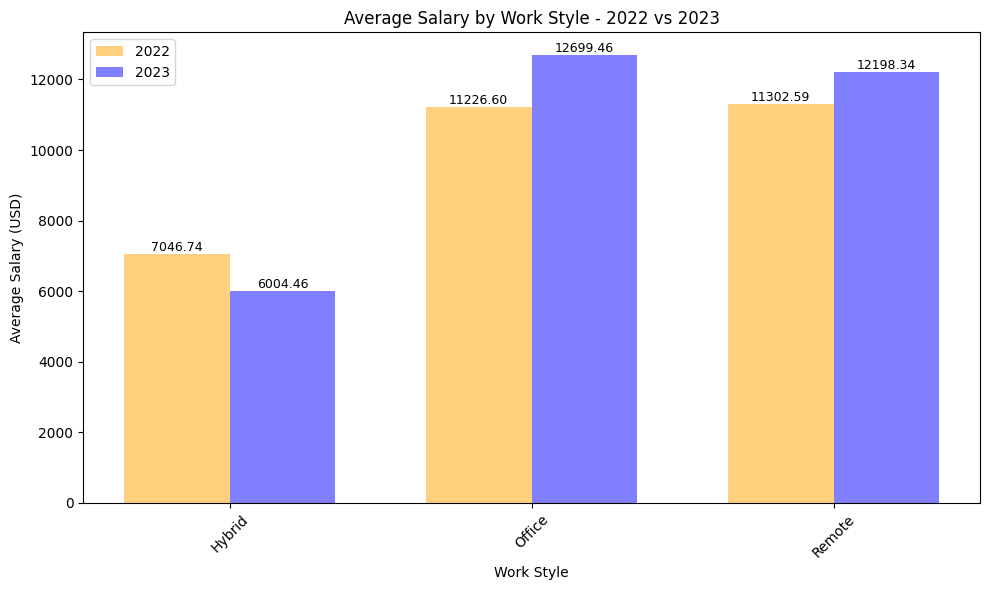

In [8]:
# Compared the salaries of work styles in 2022 and 2023
df_2023 = df[df["work_year"] == 2023][["work_style", "salary_in_usd"]]
average_salary_by_work_style_2023 = df_2023.groupby("work_style")["salary_in_usd"].mean().round(2).sort_index()

df_2022 = df[df["work_year"] == 2022][["work_style", "salary_in_usd"]]
average_salary_by_work_style_2022 = df_2022.groupby("work_style")["salary_in_usd"].mean().round(2).sort_index()

work_styles = average_salary_by_work_style_2022.index
salary_2022 = average_salary_by_work_style_2022.values
salary_2023 = average_salary_by_work_style_2023.values
index = np.arange(len(work_styles))
x_label = 'Work Style'
y_label = 'Average Salary (USD)'
title = 'Average Salary by Work Style - 2022 vs 2023'


barplot(index, salary_2022 , salary_2023, x_label, y_label, title, work_styles, use_salary_format=True)

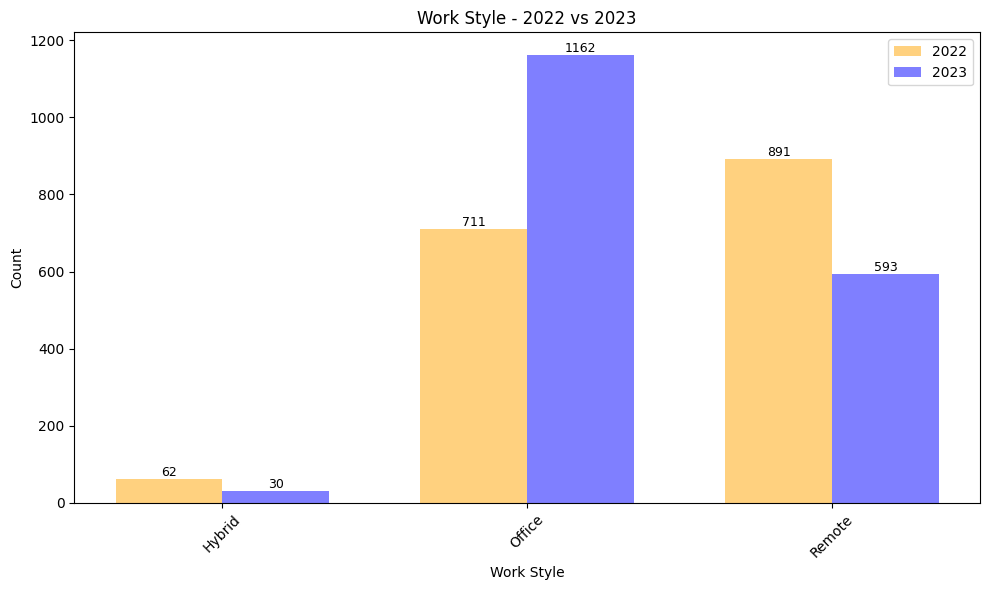

In [9]:
# Compared the work styles in 2022 and 2023
workstyle_counts_2023 = df[df['work_year'] == 2023]['work_style'].value_counts().sort_index()
workstyle_counts_2022 = df[df['work_year'] == 2022]['work_style'].value_counts().sort_index()


work_styles = workstyle_counts_2022.index
work_styles_2022 = workstyle_counts_2022.values
work_styles_2023 = workstyle_counts_2023.values
index = np.arange(len(work_styles))
x_label = 'Work Style'
y_label = 'Count'
title = 'Work Style - 2022 vs 2023'


barplot(index, work_styles_2022 , work_styles_2023, x_label, y_label, title, work_styles, use_salary_format=False)

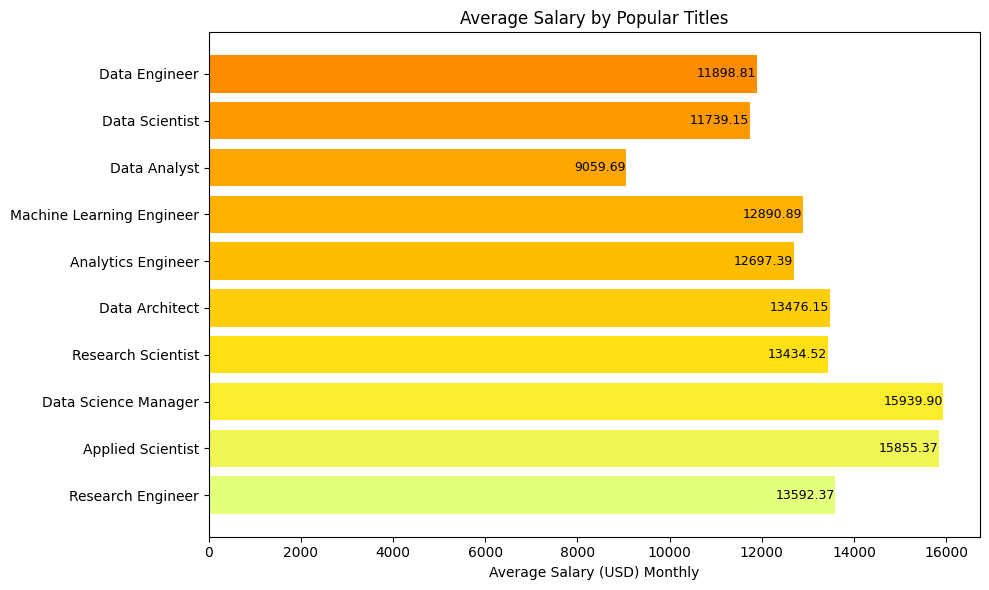

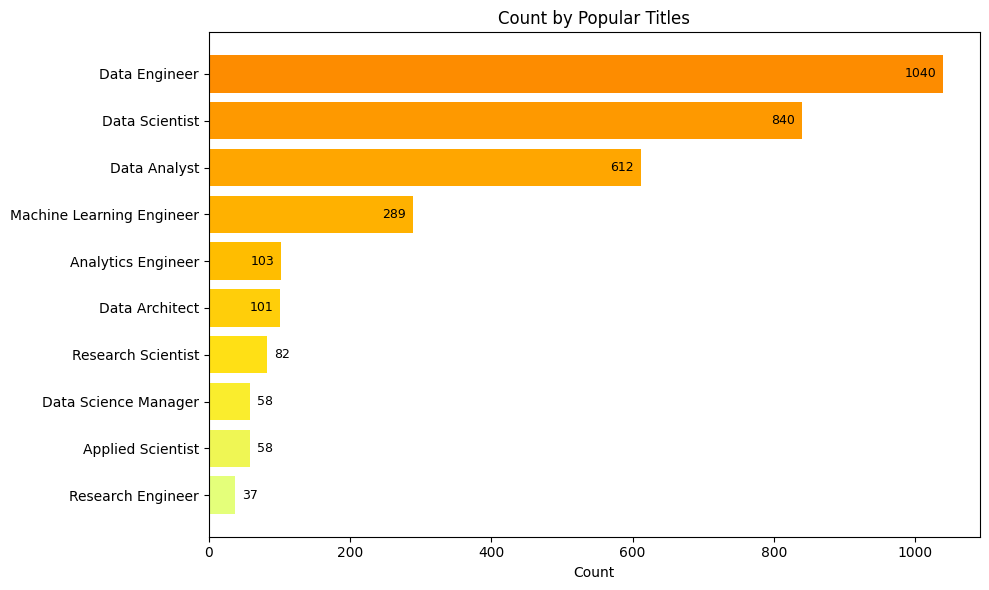

In [10]:
# First, the number of individuals working in each job title in the dataset was determined. Then, the top 10 job titles with the highest number of individuals were extracted, and the average salary for these 10 job titles was calculated
employee_count_by_title = df['job_title'].value_counts()
top_10_job_titles = employee_count_by_title.head(10)
reindex = top_10_job_titles[::-1]
average_salary_by_title = df[df['job_title'].isin(top_10_job_titles.index)].groupby('job_title')['salary_in_usd'].mean().round(2)
average_salary_by_title = average_salary_by_title.reindex(reindex.index)

# Average Salary by Job Title
x_label = 'Average Salary (USD) Monthly'
title = 'Average Salary by Popular Titles'
cmap = 'Wistia'
figsize = [10,6]
barhplot(average_salary_by_title.index, average_salary_by_title, x_label, title, cmap, figsize, use_salary_format=True)

# Count of employees per Job Title
x_label1 = 'Count'
title1 = 'Count by Popular Titles'
cmap1 = 'Wistia'
figsize1 = [10,6]
barhplot(top_10_job_titles[::-1].index, top_10_job_titles[::-1], x_label1, title1, cmap1, figsize1, use_salary_format=False)


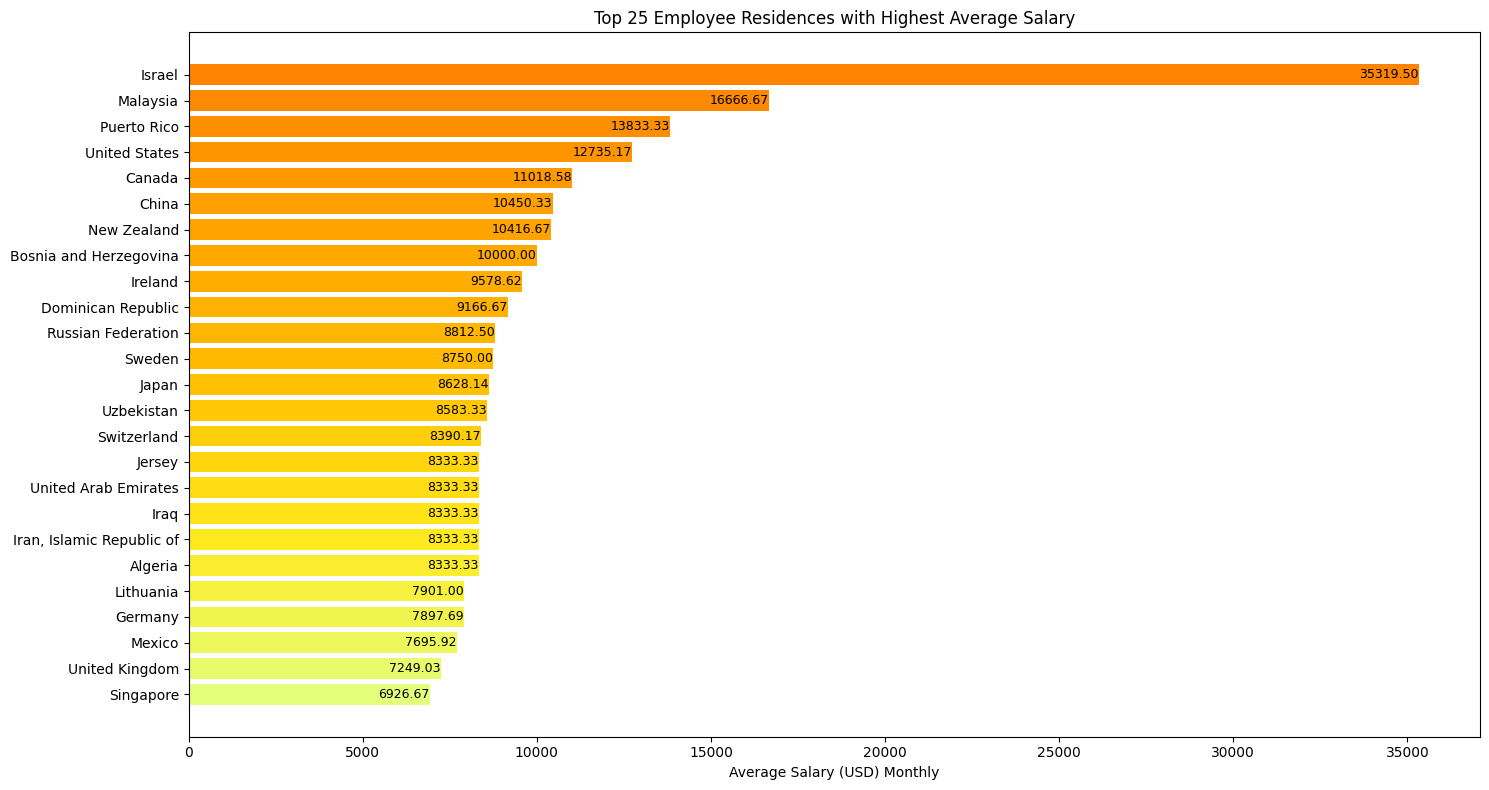

In [11]:
# Showing the Top 25 Countries where employees with the highest salaries reside
data = df[["employee_residence", "salary_in_usd"]].groupby(["employee_residence"], as_index=False).mean().round(2).sort_values(by="salary_in_usd", ascending=False).head(25)

x_label = 'Average Salary (USD) Monthly'
title = 'Top 25 Employee Residences with Highest Average Salary'
cmap = 'Wistia'
figsize = [15,8]
barhplot(data["employee_residence"][::-1], data["salary_in_usd"][::-1], x_label, title, cmap, figsize, use_salary_format=True)

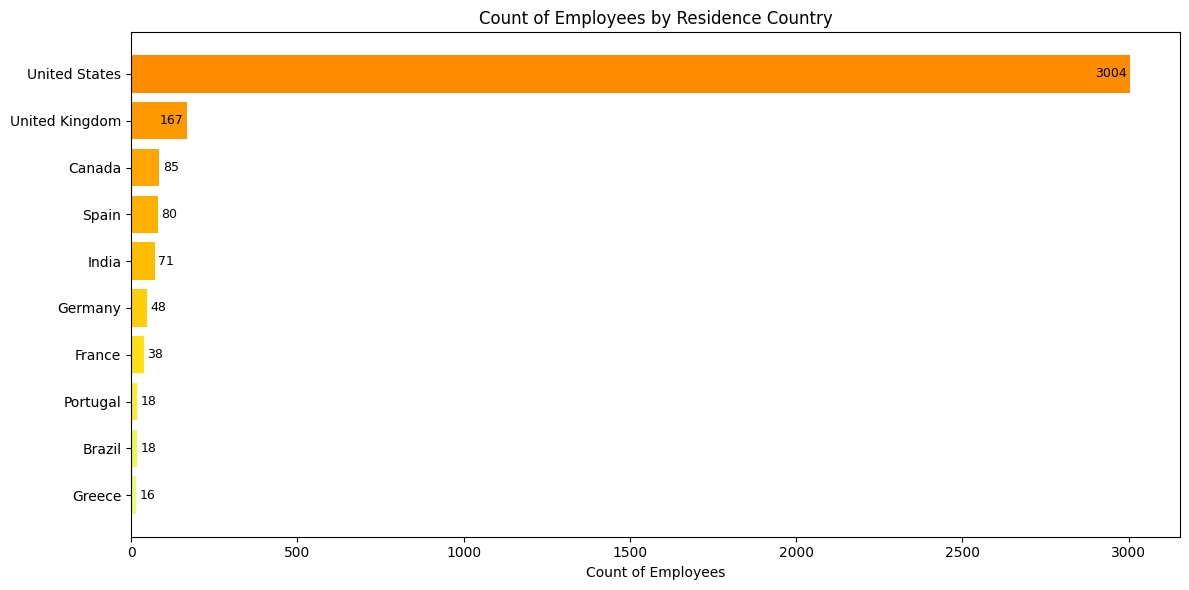

In [12]:
# Count of Employees by Country of Residence
x_label = 'Count of Employees'
title = 'Count of Employees by Residence Country'
cmap = 'Wistia'
figsize = [12, 6]

country_counts = df["employee_residence"].value_counts().head(10)

barhplot(country_counts.index[::-1], country_counts.values[::-1], x_label, title, cmap, figsize, use_salary_format=False)


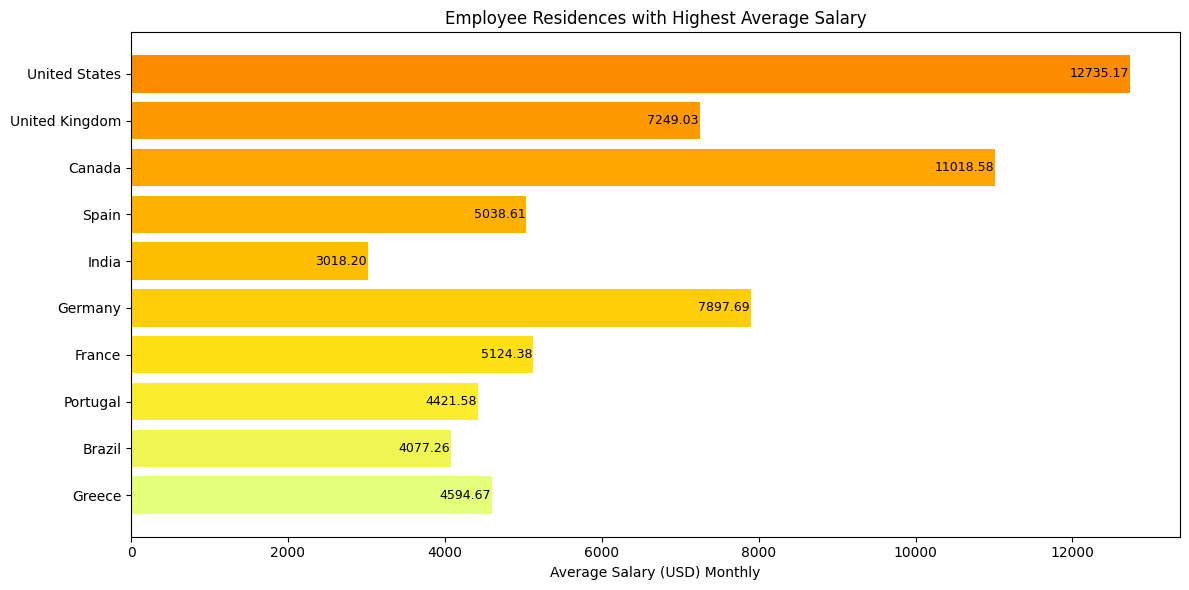

In [13]:
# The average salaries of the most commonly resided countries
x_label = 'Average Salary (USD) Monthly'
title = 'Employee Residences with Highest Average Salary'
cmap = 'Wistia'
figsize = [12, 6]

top_10_countries = df[df["employee_residence"].isin(country_counts.index)].groupby("employee_residence")["salary_in_usd"].mean().round(2)
top_10_countries = top_10_countries.reindex(country_counts.index)
barhplot(top_10_countries.index[::-1], top_10_countries.values[::-1], x_label, title, cmap, figsize, use_salary_format=True)